# Dataset: Stanford Open Policing Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
ri = pd.read_csv("police.csv")

## 1. Remove the column that only contains missing values

In [93]:
ri.dropna(axis= "columns", how="all",inplace=True)

## 2. Do men or women speed more often

In [32]:
#driver_gender , violation
ri[ri["violation"] == "Speeding"]["driver_gender"].value_counts() / ri["driver_gender"].value_counts()

driver_gender
M    0.52435
F    0.65850
Name: count, dtype: float64

In [34]:
ri.groupby("driver_gender").violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


## 3. Does gender affect who gets searched during a stop

In [42]:
# involved columns : driver_genders, search_conducted
ri.groupby("driver_gender").search_conducted.value_counts(normalize = True).unstack()

search_conducted,False,True
driver_gender,,
F,0.979967,0.020033
M,0.956674,0.043326


In [44]:
ri.groupby("driver_gender").search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

## 5. During a search, how often is the driver  frisked?

In [52]:
# search_type 
ri.search_type.str.contains("Frisk").value_counts(normalize=True)

search_type
False    0.914268
True     0.085732
Name: proportion, dtype: float64

## 6. Which year had the least number of stops?

<Axes: xlabel='stop_date'>

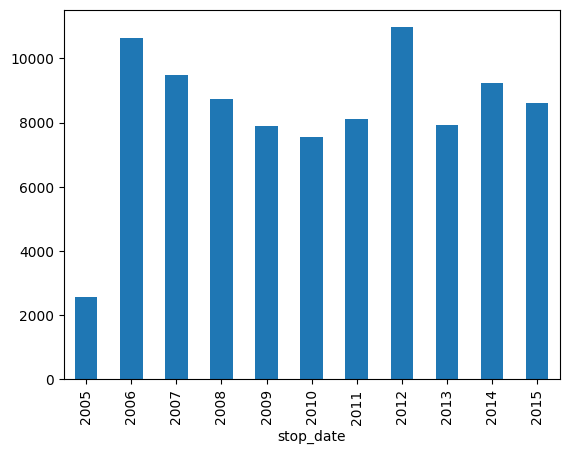

In [79]:
pd.to_datetime(ri.stop_date).dt.year.value_counts().sort_index().plot.bar()

# 7. How does drug activity change by time of the day?

<Axes: xlabel='new_time'>

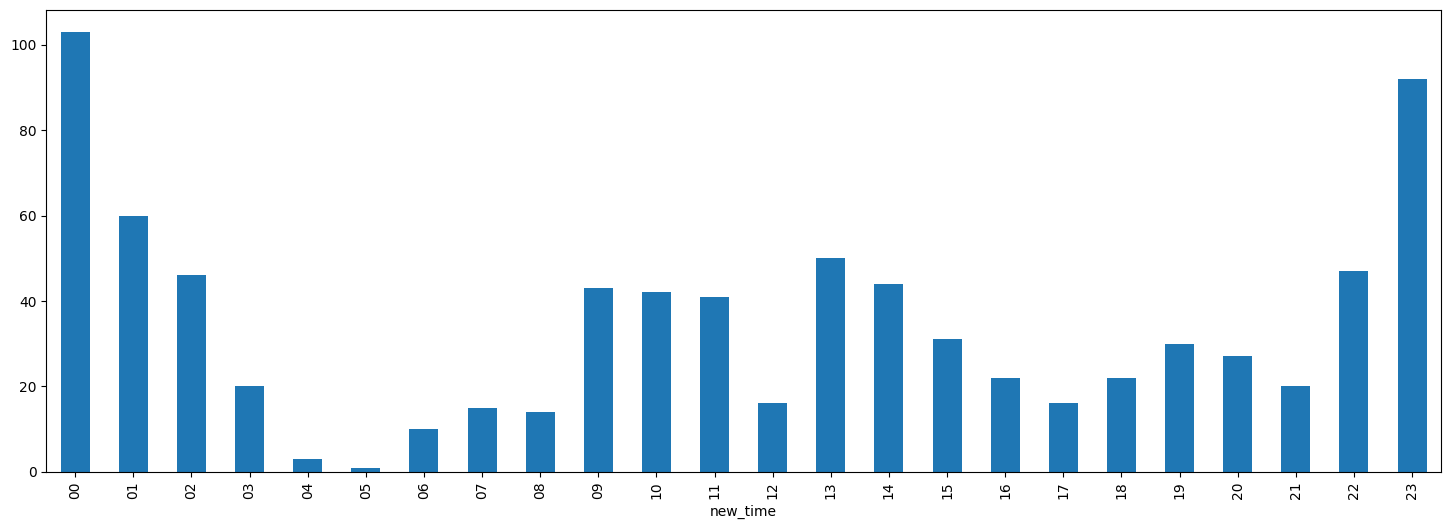

In [74]:

ri["new_time"] = ri.stop_time.str[0:2]
plt.figure(figsize=(18,6))
ri[ri.drugs_related_stop == True].groupby("new_time").drugs_related_stop.sum().plot.bar()

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_17200\1140942081.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_season(season)[ri.drugs_related_stop == True].groupby("new_time").drugs_related_stop.sum().plot.bar()
C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_17200\1140942081.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_season(season)[ri.drugs_related_stop == True].groupby("new_time").drugs_related_stop.sum().plot.bar()
C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_17200\1140942081.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_season(season)[ri.drugs_related_stop == True].groupby("new_time").drugs_related_stop.sum().plot.bar()
C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_17200\1140942081.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_season(season)[ri.drugs_related_stop == True].groupby("new_time").drugs_re

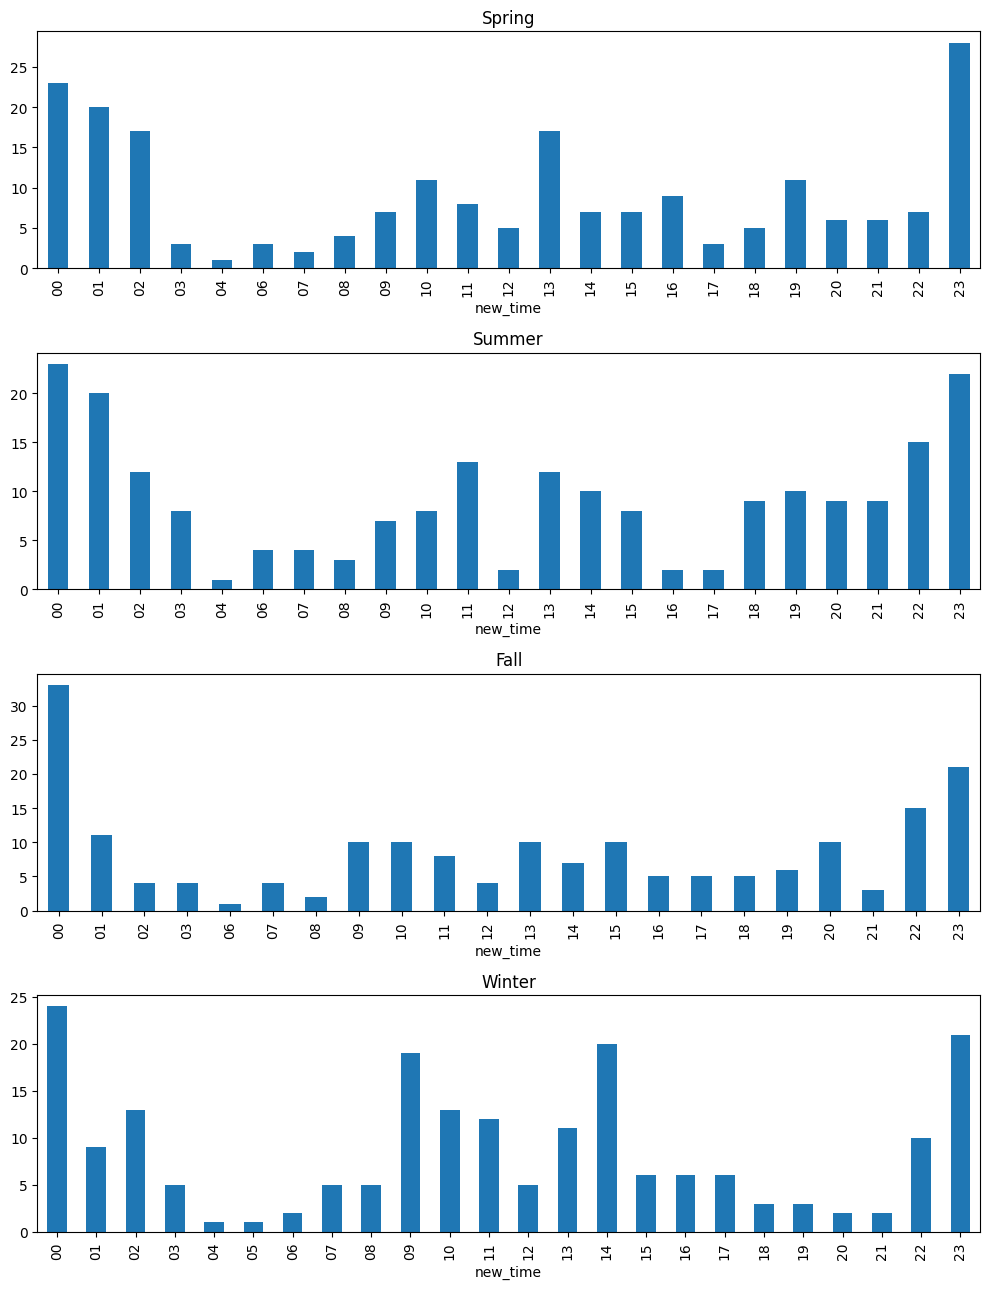

In [75]:
ri.stop_date = pd.to_datetime(ri.stop_date)

def get_season(season):
    if season == "Spring":
            return ri[(ri.stop_date.dt.month >= 3) & (ri.stop_date.dt.month <= 5)]
    elif season == "Summer":
        return ri[(ri.stop_date.dt.month >= 6) & (ri.stop_date.dt.month <= 8)]
    elif season == "Fall":
        return ri[(ri.stop_date.dt.month >= 9) & (ri.stop_date.dt.month <= 11)]
    elif season == "Winter":
        return ri[(ri.stop_date.dt.month == 12) | (ri.stop_date.dt.month <= 2)]

seasons = ["Spring", "Summer", "Fall", "Winter"]

plt.figure(figsize=(10,13))
for i, season in enumerate(seasons, 1):
    plt.subplot(4,1,i)
    get_season(season)[ri.drugs_related_stop == True].groupby("new_time").drugs_related_stop.sum().plot.bar()
    plt.title(season)

plt.tight_layout()
plt.show()

## 9. Find the bad data in the stop_duration column and fix it

In [94]:
ri.stop_duration.value_counts(dropna=False)

stop_duration
0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: count, dtype: int64

In [95]:
bad = ["1", "2"]
ri.drop(ri[ri.stop_duration.isin(bad)].index, inplace=True)  
ri.stop_duration.value_counts()

stop_duration
0-15 Min     69543
16-30 Min    13635
30+ Min       3228
Name: count, dtype: int64